<a href="https://colab.research.google.com/github/Aerospace-prog/ML-Engineer-Notes/blob/main/ML_Engineer_Roadmap_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Engineer Notes and Code Logic

## Classification Models


### KNN (K-Nearest Neighbors)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

#1 Data : [Height in cm , Weight in kg]
X_train = [[150, 45], [155, 50], [175, 80], [180, 90]]
y_train = ["Small", "Small", "Large", "Large"]

#2 Model : Lazy Learning - it just stores the data
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train , y_train)

#3 Predict :  New person: 160cm, 55kg.
# The model measures distance to all 4 points above and picks the closest 3.

X_new = np.array([[160,55]])
preds = model.predict(X_new)
print(preds)
# Output: ['Small'] (Because it's closer to the 150/155 data points)

['Small']


### LogisticRegression (Classification Model)

In [11]:
from sklearn.linear_model import LogisticRegression

# Data: [Hours Studied, Hours Slept]
X = [[2, 5], [3, 6], [8, 7], [10, 8]]
# Label: 0 = Fail, 1 = Pass
y = [0, 0, 1, 1]

model = LogisticRegression()
model.fit(X,y)

# Prediction
test_student = [[6,7]]

#1 Hard Predict :- Answer in Yes or No/True or False
print(model.predict(test_student))

#2 Soft Predict :- Answer in Probability
print(model.predict_proba(test_student))

[1]
[[0.39946336 0.60053664]]


### SVM (Support Vector Machines)

In [13]:
from sklearn import svm

# Data: [Height, Weight]
# 0 = Basketball Player, 1 = Sumo Wrestler
X = [[200, 100], [210, 110], [170, 150], [175, 160]]
y = [0, 0, 1, 1]

# 1 Linear Kernel : For simple straight line
# model = svm.SVC(kernal = 'linear')

# 2 RBF Kernel : Radial Basis Function - The "Lifting" Trick)
# Used when data is curvy or complex
model = svm.SVC(kernel = 'rbf')

model.fit(X, y)

# Predict
print(model.predict([[180, 155]]))
# Output: [1] (Likely a Sumo Wrestler)

[1]


### Decision Tree & Random Forest

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Data: [Wings?, Barks?, Fur?]
# 1=Yes, 0=No
X = [[0, 1, 1], [1, 0, 0], [0, 0, 1], [0, 1, 1]]
y = ["Dog", "Bird", "Cat", "Dog"]

# --- OPTION 1: Single Decision Tree ---
# Good for explaining "Why", but can over-memorize (Overfit)
tree_model = DecisionTreeClassifier()
tree_model.fit(X, y)

# --- OPTION 2: Random Forest ---
# Builds 100 trees (n_estimators=100). Harder to explain, but much more accurate.
forest_model = RandomForestClassifier(n_estimators=100)
forest_model.fit(X, y)

# Predict: No wings, No bark, Has fur
print("Forest Model\n")
print(forest_model.predict([[0, 0, 1]]))
print("Tree Model\n")
print(tree_model.predict([[0, 0, 1]]))
# Output: ['Cat']

Forest Model

['Cat']
Tree Model

['Cat']


### Gradient Boosting Machine


In [26]:
!pip install xgboost

In [36]:
# XGBoost is not in sklearn standard library, you usually install it separately

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Data: [Credit Score, Debt, Income]
X = [[600, 5000, 30], [800, 0, 100], [550, 10000, 25], [750, 2000, 80]]
# Label: 1 = Default (Bad), 0 = Pay (Good)
y = [1, 0, 1, 0]

# Split data (Crucial for boosting to prevent overfitting)
X_train , X_test , y_train , y_test = train_test_split(
    X,
    y,
    test_size = 0.2
)

# 1. Initialize XGBoost
# n_estimators=100 (100 shots/trees)
# learning_rate=0.1 (Don't correct too fast, take small steps)
model = XGBClassifier(n_estimators = 100 , learning_rate = 0.1)

# 2. Train
model.fit(X_train,y_train)

# 3. Predict
print(model.predict([[620, 4000, 35]]))
# Output: [1] (Likely to default)

[1]


## Regression Models

### Linear Regression

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Data: [Square Footage]
X = [[1000], [1500], [2000], [2500]]
# Label: [Price in $]
y = [200000, 300000, 400000, 500000]

# 1. Initialize
model = LinearRegression()

# 2. Train (The model finds the best 'm' and 'c')
model.fit(X, y)

# 3. Predict
# What is the price of a 1200 sqft house?
prediction = model.predict([[1200]])

print(f"Predicted Price: ${round(prediction[0])}")
# Output: $240,000 (It figured out the pattern is $200 per sqft)

# check the math it learned:
print(f"Slope (m): {model.coef_[0]}") # Output: 200

Predicted Price: $240000
Slope (m): 199.99999999999991


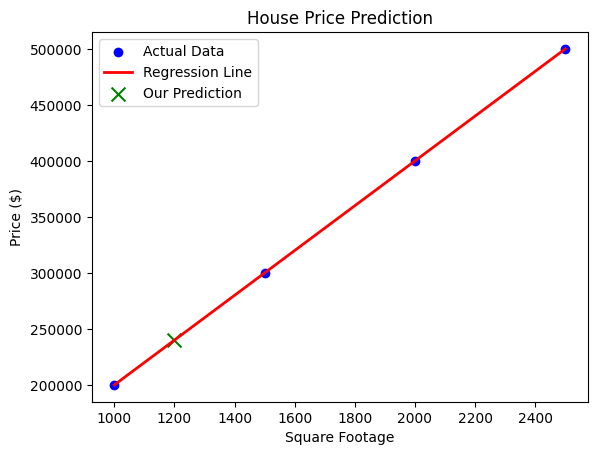

In [6]:
# Plotting the Predictions on Graph
import matplotlib.pyplot as plt

# Plot the original data points
plt.scatter(X, y, color='blue', label='Actual Data')

# Plot the regression line (predictions across the range)
# We predict on X to draw the line that connects the points
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')

# Highlight our specific 1200 sqft prediction
plt.scatter([[1200]], prediction, color='green', marker='x', s=100, label='Our Prediction')

plt.xlabel('Square Footage')
plt.ylabel('Price ($)')
plt.title('House Price Prediction')
plt.legend()
plt.show()